# Climate Data Project - Simple Data Pipeline Template

This notebook contains template code for interfacing with an AWS S3 Bucket containing climate model output. This code assumes certain Python packages are already installed in the environment and that the user has a reliable internet connection. A Docker container is provided in the same repository to run this notebook with all the necessary packages/software, otherwise a virtual environment can be created using the `requirements.txt` with either Conda or Python venv.


## Connect to Pangeo CMIP6 S3 Bucket

Below we pull the index for datasets stored in the bucket:

In [1]:
import pandas as pd

df = pd.read_csv("https://cmip6-pds.s3.amazonaws.com/pangeo-cmip6.csv")

df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,ta,gn,s3://cmip6-pds/CMIP6/HighResMIP/CMCC/CMCC-CM2-...,NaN,20170706
1,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,tauv,gn,s3://cmip6-pds/CMIP6/HighResMIP/CMCC/CMCC-CM2-...,NaN,20170706
2,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,zg,gn,s3://cmip6-pds/CMIP6/HighResMIP/CMCC/CMCC-CM2-...,NaN,20170706
3,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,vas,gn,s3://cmip6-pds/CMIP6/HighResMIP/CMCC/CMCC-CM2-...,NaN,20170706
4,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/HighResMIP/CMCC/CMCC-CM2-...,NaN,20170706
...,...,...,...,...,...,...,...,...,...,...,...
522212,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,uas,gr,s3://cmip6-pds/CMIP6/CMIP/EC-Earth-Consortium/...,NaN,20211207
522213,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,va,gr,s3://cmip6-pds/CMIP6/CMIP/EC-Earth-Consortium/...,NaN,20211207
522214,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,wap,gr,s3://cmip6-pds/CMIP6/CMIP/EC-Earth-Consortium/...,NaN,20211207
522215,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,tas,gr,s3://cmip6-pds/CMIP6/CMIP/EC-Earth-Consortium/...,NaN,20211207


We can filter and sort through the index to find the datasets we want:

In [2]:
cesm_ssp370_daily_pr_info = df.query("experiment_id=='ssp370' & table_id=='day' & variable_id=='pr' & source_id=='CESM2'")
cesm_ssp585_daily_pr_info = df.query("experiment_id=='ssp585' & table_id=='day' & variable_id=='pr' & source_id=='CESM2'")
cesm_ssp126_daily_pr_info = df.query("experiment_id=='ssp126' & table_id=='day' & variable_id=='pr' & source_id=='CESM2'")
cesm_hist_daily_pr_info = df.query("experiment_id=='historical' & table_id=='day' & variable_id=='pr' & source_id=='CESM2'")

# We need to drop a few members from the historical data because they have slightly different coordinate data that will cause issues later
cesm_hist_daily_pr_info = cesm_hist_daily_pr_info[cesm_hist_daily_pr_info["member_id"] != 'r4i1p1f1']
cesm_hist_daily_pr_info = cesm_hist_daily_pr_info[cesm_hist_daily_pr_info["member_id"] != 'r11i1p1f1']

cesm_hist_daily_pr_info

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
69378,CMIP,NCAR,CESM2,historical,r1i1p1f1,day,pr,gn,s3://cmip6-pds/CMIP6/CMIP/NCAR/CESM2/historica...,NaN,20190401
69389,CMIP,NCAR,CESM2,historical,r8i1p1f1,day,pr,gn,s3://cmip6-pds/CMIP6/CMIP/NCAR/CESM2/historica...,NaN,20190401
69393,CMIP,NCAR,CESM2,historical,r7i1p1f1,day,pr,gn,s3://cmip6-pds/CMIP6/CMIP/NCAR/CESM2/historica...,NaN,20190401
69394,CMIP,NCAR,CESM2,historical,r9i1p1f1,day,pr,gn,s3://cmip6-pds/CMIP6/CMIP/NCAR/CESM2/historica...,NaN,20190401
69402,CMIP,NCAR,CESM2,historical,r3i1p1f1,day,pr,gn,s3://cmip6-pds/CMIP6/CMIP/NCAR/CESM2/historica...,NaN,20190401
69405,CMIP,NCAR,CESM2,historical,r2i1p1f1,day,pr,gn,s3://cmip6-pds/CMIP6/CMIP/NCAR/CESM2/historica...,NaN,20190401
69418,CMIP,NCAR,CESM2,historical,r6i1p1f1,day,pr,gn,s3://cmip6-pds/CMIP6/CMIP/NCAR/CESM2/historica...,NaN,20190401
69448,CMIP,NCAR,CESM2,historical,r5i1p1f1,day,pr,gn,s3://cmip6-pds/CMIP6/CMIP/NCAR/CESM2/historica...,NaN,20190401


## Read Datasets using Zarr

This doesn't download the data, but instead pulls the structure and metadata. We will then build a "task graph" (think of it as a computational "order" that is just being planned not executed).

The S3 paths to each of the Zarr stores are described in the "zstore" attribute. Here we read those Zarr stores and then concatenate them by their ensemble member labels:

In [3]:
import xarray as xr
import s3fs


def get_concat_dataset(file_interface, s3_paths):
    datasets = []
    ensemble_member_labels = []
    for s3_path in s3_paths:
        ensemble_member_labels.append(s3_path.split("/")[-6])
        mapper = fs.get_mapper(s3_path)
        datasets.append(xr.open_zarr(mapper, consolidated=True))

    return xr.concat(datasets, dim="member").assign_coords(dict(member=ensemble_member_labels))

fs = s3fs.S3FileSystem(anon=True)

cesm_ssp370_daily_pr = get_concat_dataset(fs, cesm_ssp370_daily_pr_info["zstore"])
cesm_ssp585_daily_pr = get_concat_dataset(fs, cesm_ssp585_daily_pr_info["zstore"])
cesm_ssp126_daily_pr = get_concat_dataset(fs, cesm_ssp126_daily_pr_info["zstore"])
cesm_hist_daily_pr = get_concat_dataset(fs, cesm_hist_daily_pr_info["zstore"])

cesm_hist_daily_pr

<xarray.Dataset> Size: 107GB
Dimensions:    (member: 8, time: 60226, lat: 192, lon: 288, nbnd: 2)
Coordinates:
  * member     (member) <U8 256B 'r1i1p1f1' 'r8i1p1f1' ... 'r6i1p1f1' 'r5i1p1f1'
  * time       (time) object 482kB 1850-01-01 00:00:00 ... 2015-01-01 00:00:00
  * lat        (lat) float64 2kB -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 2kB 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
    lat_bnds   (lat, nbnd) float64 3kB -90.0 -89.53 -89.53 ... 89.53 89.53 90.0
    lon_bnds   (lon, nbnd) float64 5kB -0.625 0.625 0.625 ... 358.1 358.1 359.4
    time_bnds  (time, nbnd) object 964kB 1850-01-01 00:00:00 ... 2015-01-01 0...
Dimensions without coordinates: nbnd
Data variables:
    pr         (member, time, lat, lon) float32 107GB dask.array<chunksize=(1, 550, 192, 288), meta=np.ndarray>
Attributes: (12/46)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   674885.0
    branch_time_in_parent:  219000.0
    case_id:                15
    ...                     ...
    table_id:               day
    tracking_id:            hdl:21.14100/c9b7ee29-8ac2-46d4-9e5c-b309b1ef0999...
    variable_id:            pr
    variant_info:           CMIP6 20th century experiments (1850-2014) with C...
    variant_label:          r1i1p1f1
    status:                 2019-10-25;created;by nhn2@columbia.edu

## Dask Arrays and Parallel Computing

This does not download the dataset, just the structure and attributes. Inspecting the structure, the data is "chunked" into "dask.array" objects that are small relative to the whole dataset. For example, the historical dataset above is 100 GB, but each chunk is only 116 MB. These smaller chunks allow us to divide our computations into pieces that can be calculated on computers with limited RAM and disk space. This also allows us to use [parallel computing](https://en.wikipedia.org/wiki/Parallel_computing) to calculate each of these pieces using multiple CPU cores simultanesouly, reducing the amount of time needed to calculate the whole computation. **This is an optimal way of leveraging modern computer hardware to analyze big data stored in the cloud**.

To execute computations in parallel, we need a "cluster" to distribute the pieces across.

In [ ]:
import dask.distributed as daskd

cluster = daskd.LocalCluster(n_workers=6, threads_per_worker=1, memory_limit="1GB")
client = cluster.get_client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 6
Total threads: 6,Total memory: 5.59 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:40443,Workers: 0
Dashboard: http://127.0.0.1:8787/status,Total threads: 0
Started: Just now,Total memory: 0 B
Comm: tcp://127.0.0.1:35633,Total threads: 1
Dashboard: http://127.0.0.1:33629/status,Memory: 0.93 GiB
Nanny: tcp://127.0.0.1:41183,


2025-12-04 17:17:10,580 - tornado.application - ERROR - Uncaught exception GET /status/ws (172.17.0.1)
HTTPServerRequest(protocol='http', host='127.0.0.1:8787', method='GET', uri='/status/ws', version='HTTP/1.1', remote_ip='172.17.0.1')
Traceback (most recent call last):
  File "/opt/conda/lib/python3.13/site-packages/tornado/websocket.py", line 965, in _accept_connection
    open_result = handler.open(*handler.open_args, **handler.open_kwargs)
  File "/opt/conda/lib/python3.13/site-packages/tornado/web.py", line 3375, in wrapper
    return method(self, *args, **kwargs)
  File "/opt/conda/lib/python3.13/site-packages/bokeh/server/views/ws.py", line 149, in open
    raise ProtocolError("Token is expired. Configure the app with a larger value for --session-token-expiration if necessary")
bokeh.protocol.exceptions.ProtocolError: Token is expired. Configure the app with a larger value for --session-token-expiration if necessary


The Dask dashboard allows us to monitor the status of each "worker" (process to recieve one Dask array at a time), including how much of the CPU and RAM they are using.

## Example Computation

Below, we take the mean of a simulation dataset over all ensemble members and time. This code does not calculate the computation; it constructs a "task graph" that contains all of the information Dask needs to compute it when we are ready. This gives us the ability to plan our computation out and optimize it if needed. With big datasets, especially terabytes of data, executing a computation without planning can cost a lot of money (this is more important in non-academic settings).

In [5]:
cesm_ssp370_daily_pr["pr"]

<xarray.DataArray 'pr' (member: 3, time: 31391, lat: 192, lon: 288)> Size: 21GB
dask.array<concatenate, shape=(3, 31391, 192, 288), dtype=float32, chunksize=(1, 274, 192, 288), chunktype=numpy.ndarray>
Coordinates:
  * member   (member) <U9 108B 'r10i1p1f1' 'r11i1p1f1' 'r4i1p1f1'
  * time     (time) object 251kB 2015-01-01 00:00:00 ... 2101-01-01 00:00:00
  * lat      (lat) float64 2kB -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon      (lon) float64 2kB 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Attributes: (12/19)
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    comment:        chunits( ((1000 * PRECT)), units="kg m-2 s-1")
    description:    at surface; includes both liquid and solid phases from al...
    frequency:      day
    id:             pr
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Precipitation
    type:           real
    units:          kg m-2 s-1
    variable_id:    pr

In [6]:
cesm_ssp370_pr_timeseries = cesm_ssp370_daily_pr["pr"].mean(dim=["time", "member"])
cesm_ssp370_pr_timeseries

<xarray.DataArray 'pr' (lat: 192, lon: 288)> Size: 221kB
dask.array<mean_agg-aggregate, shape=(192, 288), dtype=float32, chunksize=(192, 288), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 2kB -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon      (lon) float64 2kB 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Attributes: (12/19)
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    comment:        chunits( ((1000 * PRECT)), units="kg m-2 s-1")
    description:    at surface; includes both liquid and solid phases from al...
    frequency:      day
    id:             pr
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Precipitation
    type:           real
    units:          kg m-2 s-1
    variable_id:    pr

Notice that the final array size has reduced significantly! This is good. **An optimal big data pipeline takes huge chunks of data and reduces them into smaller, more manageable summaries.** Additionally, there is a "Dask graph" entry that describes how Dask organizes the computation. In this case, Dask performs 22 steps that reduce the original dataset of 687 chunks of 57 MB each into a single 216 KB chunk (the description uses the inverse wording: 1 chunk represents 22 calculations performed across the dataset).

The final product fits nicely in memory (most hardware has well over 216 KB of RAM) and so do the incoming chunks from original dataset (we have to download those 57 MB chunks from the S3 bucket).

To instruct Dask to peform the calculation, we call the `.compute()` function. Load of the Dask dashboard using the provided URL to monitor progress!

In [7]:
cesm_ssp370_pr_timeseries = cesm_ssp370_pr_timeseries.compute()

In [8]:
cesm_ssp370_pr_timeseries

<xarray.DataArray 'pr' (lat: 192, lon: 288)> Size: 221kB
array([[2.9907208e-06, 2.9907214e-06, 2.9907198e-06, ..., 2.9907180e-06,
        2.9907189e-06, 2.9907196e-06],
       [2.8789882e-06, 2.8748702e-06, 2.8724505e-06, ..., 2.8891520e-06,
        2.8860691e-06, 2.8833194e-06],
       [2.4747119e-06, 2.4592491e-06, 2.4450030e-06, ..., 2.5233780e-06,
        2.5067693e-06, 2.4908454e-06],
       ...,
       [9.7480051e-06, 9.7737466e-06, 9.7982711e-06, ..., 9.6766944e-06,
        9.6995709e-06, 9.7234588e-06],
       [9.4752104e-06, 9.4971392e-06, 9.5087062e-06, ..., 9.4380721e-06,
        9.4475772e-06, 9.4660018e-06],
       [8.5677611e-06, 8.5677229e-06, 8.5676475e-06, ..., 8.5676947e-06,
        8.5676529e-06, 8.5677102e-06]], shape=(192, 288), dtype=float32)
Coordinates:
  * lat      (lat) float64 2kB -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon      (lon) float64 2kB 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Attributes: (12/19)
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    comment:        chunits( ((1000 * PRECT)), units="kg m-2 s-1")
    description:    at surface; includes both liquid and solid phases from al...
    frequency:      day
    id:             pr
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Precipitation
    type:           real
    units:          kg m-2 s-1
    variable_id:    pr

Notice that the final data is now stored in a normal array instead of a Dask array, indicating that it is loaded into memory with actual values (not just the structure). The data is has only lat/lon dimensions, since we reduced the other dimensions "time" and "member" by calculating the mean over each of them.

## Visualize the Results

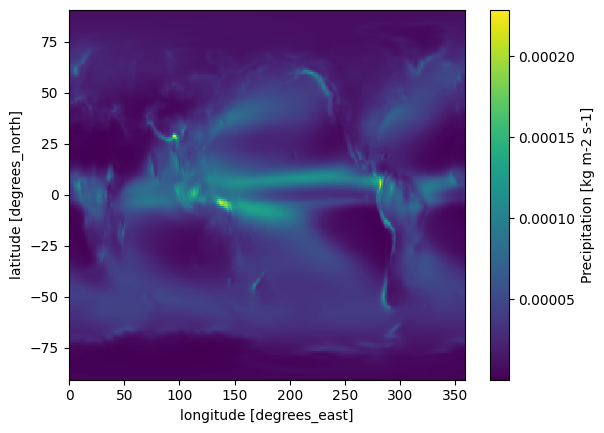

In [9]:
cesm_ssp370_pr_timeseries.plot()